<a href="https://colab.research.google.com/github/TSkinne4/MAT-421/blob/main/Module_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motiviation

In many different applications, we are interested in the rate of change of data. In the cases where we have an equation that decribes the data, it is easy enough to find an analytical derivative. In the cases where this is not the case, however, and where the data itself is all we have, we must instead use numerical methods. 

# Problem Statement

A numeical grid is an evenly spaced grid of points. For example, if we have points of the form $x_j$, the grid is evenly spaced if $x_j-x_{j-1}=h$, where h is the spacing. There are many ways of generating such a grid in python, such as linspace and range.



In [1]:
import numpy as np

x = np.linspace(0,4,5)
print('Evenly spaced points using the linspace function' , x)
y = np.arange(0,5,1)
print('List of points with a spacing of 1',y)

Evenly spaced points using the linspace function [0. 1. 2. 3. 4.]
List of points with a spacing of 1 [0 1 2 3 4]


When we deal with a function f(x) in these problems, we will be using a discretized x. Often, this is how data will be collected. 

# Finte Difference Apprximating Derivative

Recall the definition of te derivative,

$$f'(a) = \lim_{x\rightarrow a}\frac{f(x)-f(a)}{x-a}.$$
Note that while the derivative is found taking the limit as the two points approach the same value, we still estimate the derivative without this limit. This is a finite difference approximation, as opposed to the infentesimal difference found in the definition. When taking the derivative numerically, we have three choices as to what points to use, the first being the forward difference
  $$f'(x_j)=\frac{f(x_{j+1})-f(x_{j})}{x_{j_1}-x_{j}},$$
the next being the backaward difference
  $$f'(x_j)=\frac{f(x_{j})-f(x_{j-1})}{x_{j}-x_{j-1}}$$
and the final being the centeral difference
$$f'(x_j)=\frac{f(x_{j+1})-f(x_{j-1})}{x_{j+1}-x_{j-1}}.$$

The followng point shows the analytical derivative of a parabola compared to the differnt schemes



Text(0, 0.5, "f'(x)")

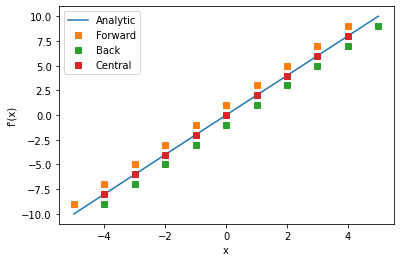

In [2]:
import matplotlib.pyplot as plt

x = np.arange(-5,6)
f = np.power(x,2)

forward = (f[1:]-f[:-1])/(x[1:]-x[:-1])
back = (f[1:]-f[:-1])/(x[1:]-x[:-1])
central = (f[2:]-f[:-2])/(x[2:]-x[:-2])


plt.plot(x,2*x, label = 'Analytic') #Analytic derivative
plt.plot(x[:-1],back, 's',label = 'Forward')
plt.plot(x[1:],back, 's',label = 'Back')
plt.plot(x[1:-1],central,'s', label = 'Central')
plt.legend()
plt.xlabel('x')
plt.ylabel('f\'(x)')

We can get these forms of the derivative as well from the Taylor series about $x_j$
$$\begin{align}
f(x) &= f(x_j)+f'(x_j)(x-x_{j})+\frac{f''(x_j)}{2!}(x-x_j)^2+\frac{f^{(3)}(x_j)}{3!}+...\\
f'(x_j)&= \frac{f(x)-f(x_j)}{x-x_j}
-\frac{f''(x_j)}{2!}(x-x_j)-\frac{f^{(3)}(x_j)}{3!}(x-x_j)^2-...\\
f'(x_j)&= \frac{f(x)-f(x_j)}{h}
-\frac{f''(x_j)}{2!}h-\frac{f^{(3)}(x_j)}{3!}h^2-...\end{align}$$

Here, we can see that we get what we did before for the derivate, plus some other terms. These higher order terms represent the difference between our schemes and the real derivative. These terms can be represented as $\mathcal{O}(h)$. We can retrieve the forward and back schemes by doing $x=x_{j+1}$ and $x=x_{j-1}$, respectively (note that for $x=x_{j-1}$ that $h\rightarrow -h)$. Both of these are order $\mathcal{O}(h)$. By adding both of these schemes, we obtain the central difference. One thing to note is that the central difference is $\mathcal{O}(h^2)$. Note that we can see that this method is more accurate despite the fact that it is not more difficult to caclulate 

We can follow the same procedure to find more accurate schemes, which gives better accuracy at the cost of requiring more calulations. This includes schemes such as the following:
$$f'(x_j) = \frac{f(x_{j-1})-8f(x_{j-1})+8f(x_{j+1})-f_(x_{j+2})}{12h}+\mathcal{O}(h^4)$$

The following two plots shows the central differnce scheme compared to the fourth order accurate scheme at two different seperation values

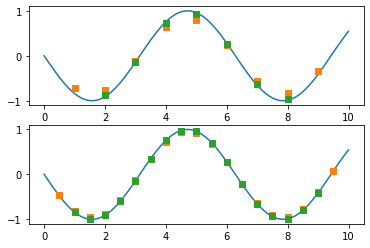

In [3]:
x = np.linspace(0,10,100)
x1 = np.arange(0,11,1)
x2 = np.arange(0,10.5,0.5)
f1 = np.cos(x1)
f2 = np.cos(x2)

y = -np.sin(x)

c1 = (f1[2:]-f1[:-2])/(x1[2:]-x1[:-2])
c2 = (f2[2:]-f2[:-2])/(x2[2:]-x2[:-2])

f1 = (f1[:-4]-8*f1[1:-3]+8*f1[3:-1]-f1[4:])/(12)
f2 = (f2[:-4]-8*f2[1:-3]+8*f2[3:-1]-f2[4:])/(12*.5)

fig, (ax1,ax2) = plt.subplots(2)
ax1.plot(x,y)
ax1.plot(x1[1:-1],c1,'s',label = 'Order h^2')
ax1.plot(x1[2:-2],f1,'s',label = 'Order h^4')
ax2.plot(x,y)
ax2.plot(x2[1:-1],c2,'s',label = 'Order h^2')
ax2.plot(x2[2:-2],f2,'s',label = 'Order h^4')

#Higher Order Derivatives

With much the same process, we can also obtain expressions for higher-order derivatices. In particular, we can obtain that
  $$f''(x_j) = \frac{f(x_{j+1}-2f(x_j)+f(x_{j-1}))}{h^2}+\mathcal{O}(h^2).$$

  Below, we can see this scheme used on a few different funcions

Text(0, 0.5, "f'(x)")

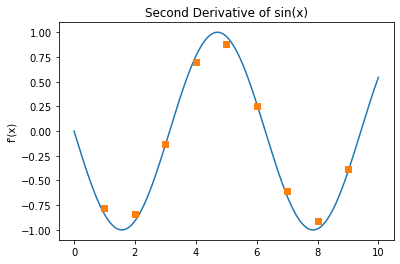

In [5]:
import numpy as np


x = np.linspace(0,10,1000)
x1 = np.arange(0,11)
y = -np.sin(x)

f = np.sin(x1)
y1= (f[2:]-2*f[1:-1]+f[:-2])/(1**2)

plt.title('Second Derivative of sin(x)')
plt.plot(x,y)
plt.plot(x1[1:-1],y1,'s')
plt.ylabel('f\'(x)')

Text(0, 0.5, "f'(x)")

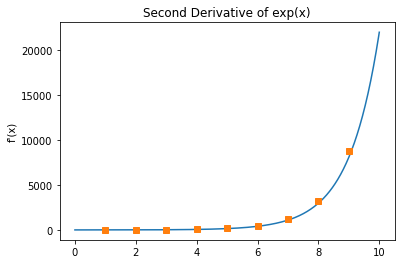

In [7]:
x = np.linspace(0,10,1000)
x1 = np.arange(0,11)
y = np.exp(x)

f = np.exp(x1)
y1= (f[2:]-2*f[1:-1]+f[:-2])/(1**2)

plt.title('Second Derivative of exp(x)')
plt.plot(x,y)
plt.plot(x1[1:-1],y1,'s')
plt.ylabel('f\'(x)')

# Numerical Differentiation with Noise

While before we have been looking at data that was generated with a mathematical function, in the real world, data comes with noice, random error that comes with measuring it. Suppose that we were to take the derivative of $f(x)=x^2$, where each point is off by a small amount that is less than 0.01, we can see that our parabola will take the shape


Text(0, 0.5, 'f(x)')

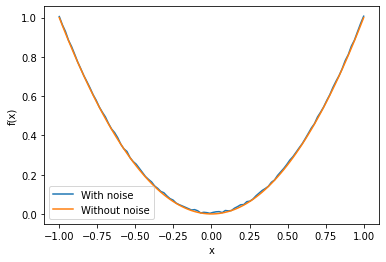

In [18]:
import matplotlib.pyplot as plt
from numpy import random as rand

x = np.linspace(-1,1,100)
f = np.power(x,2)
for i in range(len(f)):
  f[i] += 1e-2*rand.random()

plt.plot(x,f, label = 'With noise')
plt.plot(x,x**2, label = 'Without noise')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')

Note that while there is some noticible noice, that for the most part, the version with noise is almost the same.

Text(0, 0.5, "f'(x)")

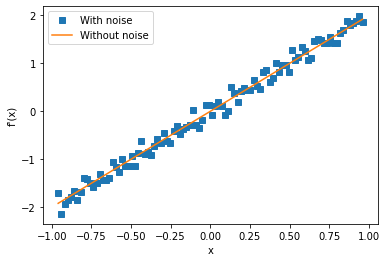

In [23]:
x = np.linspace(-1,1,100)
f = np.power(x,2)
for i in range(len(f)):
  f[i] += 1e-2*rand.random()

f1 = (f[:-4]-8*f[1:-3]+8*f[3:-1]-f[4:])/(12*2/100)

plt.plot(x[2:-2],f1,'s', label = 'With noise') #Analytic derivative
plt.plot(x[2:-2],2*x[2:-2], label = 'Without noise')
plt.legend()
plt.xlabel('x')
plt.ylabel('f\'(x)')

Note here that we can see that the noise causes the derivative to vary.